             preco_ultimo_negocio
data_pregao                      
2018-01-02                   3.19
2018-01-03                   3.25
2018-01-04                   3.22
2018-01-05                   3.36
2018-01-08                   3.56


<function matplotlib.pyplot.show(close=None, block=None)>

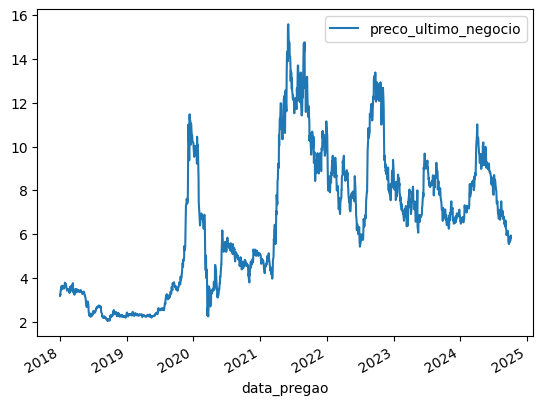

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

data = pd.read_csv('../dataset/dados_pregao_posi3.csv', header=0, parse_dates=True, index_col=0)
df = data[['preco_ultimo_negocio']]
print(df.head())
df.plot()
plt.show

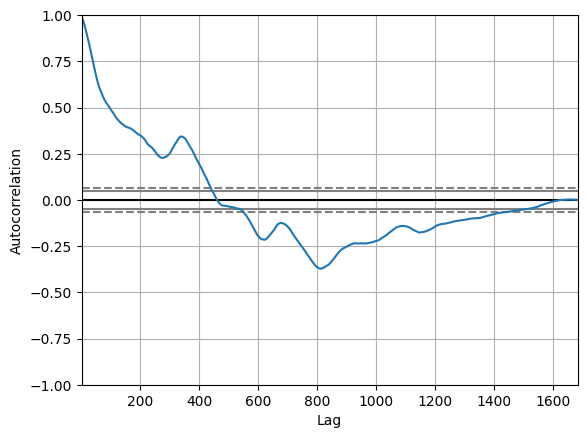

In [2]:
from pandas import read_csv
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df)
plt.show()

In [3]:
from pmdarima import auto_arima
import warnings

warnings.filterwarnings('ignore')

In [4]:
stepwise_fit = auto_arima(df['preco_ultimo_negocio'], trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=613.067, Time=1.57 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=608.474, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=607.811, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=607.890, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=606.527, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=609.537, Time=0.16 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 2.267 seconds


predicted=6.920000, expected=7.240000
predicted=7.240000, expected=7.250000
predicted=7.250000, expected=7.540000
predicted=7.540000, expected=7.880000
predicted=7.880000, expected=7.710000
predicted=7.710000, expected=8.300000
predicted=8.300000, expected=9.050000
predicted=9.050000, expected=8.960000
predicted=8.960000, expected=9.450000
predicted=9.450000, expected=9.680000
predicted=9.680000, expected=9.590000
predicted=9.590000, expected=9.440000
predicted=9.440000, expected=9.160000
predicted=9.160000, expected=9.000000
predicted=9.000000, expected=9.030000
predicted=9.030000, expected=9.000000
predicted=9.000000, expected=9.060000
predicted=9.060000, expected=9.220000
predicted=9.220000, expected=9.150000
predicted=9.150000, expected=9.300000
predicted=9.300000, expected=9.360000
predicted=9.360000, expected=9.020000
predicted=9.020000, expected=9.060000
predicted=9.060000, expected=8.760000
predicted=8.760000, expected=8.680000
predicted=8.680000, expected=8.500000
predicted=8.

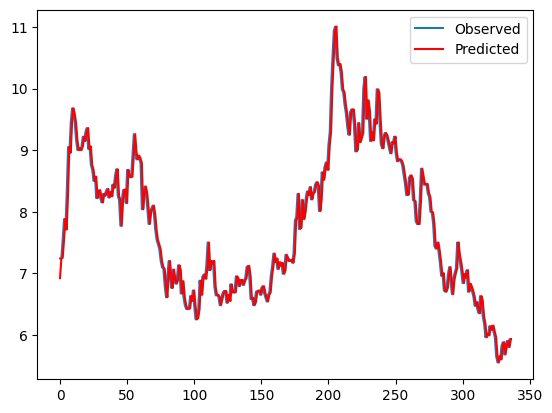

In [5]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

X = df.values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit()

    output = model_fit.forecast()
    yhat = output[0]

    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

plt.plot(test, label='Observed')
plt.plot(predictions, color='red', label='Predicted')
plt.legend()
plt.show()


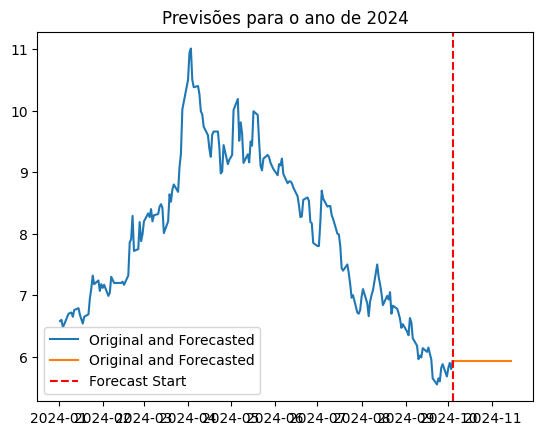

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Preparar o modelo ARIMA e fazer as previsões para os próximos 30 dias
X = df.values
history = [x for x in X]
model = ARIMA(history, order=(0,1,0))
model_fit = model.fit()
forecast = model_fit.forecast(steps=30)

# Gerar datas futuras
last_date = df.index[-1]
future_dates = pd.date_range(last_date, periods=30, freq='B')

# Adicionar previsões ao DataFrame
forecast_df = pd.DataFrame(forecast, index=future_dates, columns=['Forecast'])
df_with_forecast = pd.concat([df, forecast_df])

# Filtrar os dados apenas para o ano de 2024
df_2024 = df_with_forecast.loc['2024']

# Plotar os dados de 2024
plt.plot(df_2024, label='Original and Forecasted')
plt.axvline(x=last_date, color='red', linestyle='--', label='Forecast Start')
plt.legend()
plt.title('Previsões para o ano de 2024')
plt.show()